# Prepare NEH Grant Products Data

<b>Author:</b> Jaren Haber, PhD </br>
<b>Date</b>: September 16, 2023 </br>
<b>Description</b>: This notebook imports NEH grant product data from the web and combines the different products into a single, large DataFrame. <br/>

## Initialize

In [1]:
# Import packages
import pandas as pd
import numpy as np
from os.path import join
import gender_guesser.detector as gender # guesses gender from first name

# Import local function(s)
from utils import get_unzip, clean_unicode

## Import data from web

In [2]:
# Define URL of zipped file
data_url = 'https://apps.neh.gov/open/data/NEH_GrantProducts.zip'
fpath = '../data'

# Download zipped file and extract
get_unzip(data_url, fpath)

## Combine data for all product types

In [3]:
# Define file suffixes for grant product types
product_types = [
    'Collections', 
    'Articles', 
    'BlogPosts', 
    'Books', 
    'BookSections', 
    'Buildings', 
    'Catalogs', 
    'Centers', 
    'ComputerPrograms', 
    'ConferencePresentations', 
    'ConferenceInstituteSeminars', 
    'CourseMaterials', 
    'DatabaseEditions', 
    'Equipment', 
    'Exhibitions', 
    'FilmBroadcasts', 
    'Games', 
    'OpenAccessItems', 
    'Presentations', 
    'RadioBroadcasts', 
    'Reports', 
    'Scripts', 
    'Positions', 
    'WebResources'
]

In [4]:
## Load each product type and combine into one large DataFrame
dfs = [] # Create empty list for grant product DataFrames

# Loop over product types and add to long list of DFs
for product in product_types: 
    product_df = pd.read_xml(join('../data/NEH_GrantProducts', f'NEH_{product}.xml'))
    product_df['ProductType'] = product
    dfs.append(product_df)
    
df = pd.concat(dfs) # Combine DFs

In [5]:
# Inspect full data
print("Count of rows, columns in full data:", df.shape)
print(f"These are the {str(len(df.columns))} column names:")
print(", ".join([col for col in df.columns]))
print()
df.sample(5).iloc[:,:20] # Show first 20 columns of 5 random rows

Count of rows, columns in full data: (22609, 44)
These are the 44 column names:
ID, ApplicationNumber, Abstract, Address, Director, Name, PrimaryURL, PrimaryURLDescription, SecondaryURL, SecondaryURLDescription, Year, ProductType, AccessModel, Author, Format, PeriodicalTitle, Publisher, Title, BlogTitle, Date, Website, Editor, ISBN, Translator, Type, BookTitle, CatalogType, ProgrammingLanguage_Platform, SourceAvailable, ConferenceName, DateRange, Location, Audience, Description, Curator, Producer, Writer, PublicationType, URL3, URL3Description, URL4, URL4Description, URL5, URL5Description



,ID,ApplicationNumber,Abstract,Address,Director,Name,PrimaryURL,PrimaryURLDescription,SecondaryURL,SecondaryURLDescription,Year,ProductType,AccessModel,Author,Format,PeriodicalTitle,Publisher,Title,BlogTitle,Date
3213,8265,EH-21474-91,None,NaN,NaN,NaN,https://www.worldcat.org/search?q=9780300048230,WorldCat entry,None,None,1990.0,Books,None,"Peck, H. Daniel",NaN,NaN,New Haven: Yale University Press,Thoreau's Morning Work: Memory and Perception ...,NaN,NaN
757,23205,FT-264875-19,None,NaN,NaN,NaN,https://www.worldcat.org/search?q=253049202,WorldCat entry (253049202),None,None,2020.0,Books,None,Esra Akin-Kivanc,NaN,NaN,Indiana University Press,Muthanna / Mirror Writing in Islamic Calligrap...,NaN,NaN
528,18517,ES-267027-19,Any good educator at whatever level and in any...,NaN,NaN,NaN,None,None,None,None,NaN,ConferencePresentations,NaN,"Hilary Goodnow, Plimoth Patuxet Museums, Gerri...",NaN,NaN,NaN,Challenge = Opportunity: Supporting Profession...,NaN,11/10/2020
265,22938,HAA-266553-19,The building blocks of this dashboard are a se...,NaN,NaN,NaN,https://imperiia.scalar.fas.harvard.edu/imperi...,The URL brings you to the dashboard page withi...,None,None,2022.0,WebResources,NaN,Kelly O'Neill,NaN,NaN,NaN,Gardens of Crimea,NaN,NaN
12,99,PD-50003-06,"This collection includes audio recordings, tra...",The Archive of the Indigenous Languages of Lat...,Joel Sherzer,Ellen Basso Kalapalo Collection,http://www.ailla.utexas.org,None,None,None,2007.0,Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean up `Abstract` and `Year` columns

In [6]:
## Clean up 'Abstract' column: many null entries (don't remove empties for now)
# Define dictionary containing specific 'no abstract' language
null_dict = {'^([Nn]o\s+)?[Aa]bstract\s?(not\s+)?(provided|available)?\.?$':np.nan,
             '^[Nn]o[tn]e? available\.?$':np.nan,
             #'^(Emmy|Peabody) [Aa]ward$':np.nan, 
             '^do not have$':np.nan,
             '^\s+?available$':np.nan,
             #'^[Bb]ook$':np.nan,
             #'^([Oo]nline)?\s?[Cc]olumn$':np.nan,
             '^[Nn]one$':np.nan,
             '^Forthcoming$':np.nan,
             '^xx$':np.nan, 
             '^[Nn]a[Nn]?\.?$':np.nan,
             '^\-$':np.nan,
             '^\.$':np.nan}

# Use dictionary to replace nulls with empties
df.Abstract.replace(null_dict, 
                    regex=True, inplace=True)

df.Abstract.value_counts().loc[lambda row: row>5] # Examine any values above 5

Presented at the conference "Flannery O'Connor and Other Southern Women Writers" at Georgia College in Milledgeville, GA.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              22
Emmy Award                                                                                                                                                                                                                                                                    

In [7]:
## Clean up 'Year' column: some erroneous entries
# Define dictionary to replace errors with corrected values
year_dict = {199:1990,
             201:2010,
             202:2021,
             208:2018,
             1916:2016,
             2106:2016,
             1915:2015,
             1913:2013,
             0:np.nan}

# Apply dictionary to fix errors
df.Year.replace(year_dict, 
                regex=True, inplace=True)

df.Year.value_counts().sort_index().loc[lambda row: row==1] # Examine any values that occur just once

1950.0    1
1957.0    1
1965.0    1
1968.0    1
2025.0    1
Name: Year, dtype: int64

## Examine missingness for `Abstract`

<AxesSubplot:>

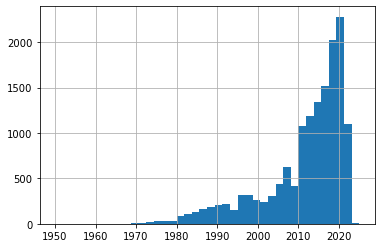

In [8]:
# As baseline, see where our 'Year' values are concentrated
df[df.Year.notnull()].Year.hist(bins=40)

<AxesSubplot:>

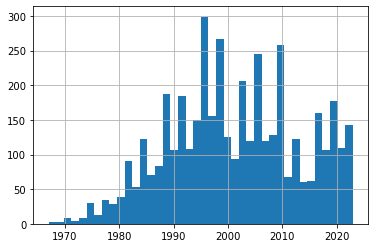

In [9]:
# Visualize frequency of missingness for Abstract column
df[df.Abstract.isnull()].Year.hist(bins=40)

<AxesSubplot:>

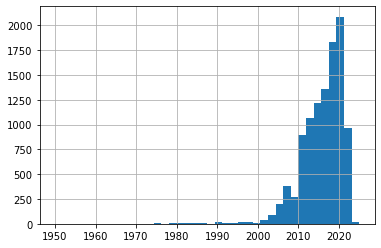

In [10]:
# Compare to frequency of non-missingness for Abstract column
df[df.Abstract.notnull()].Year.hist(bins=40)

In [11]:
len(df[(df.Abstract.notnull())])

17201

In [12]:
# What proportion of non-missing cases occurred after the year 2000?
total = len(df[df.Abstract.notnull()])
numerator = len(df[(df.Abstract.notnull()) & (df.Year>2000)])
prop = round(numerator/total*100, 1)

print(f'Out of {total} grants with Abstracts, {numerator} of them--that\'s {prop}%--made their product after the year 2000.')

Out of 17201 grants with Abstracts, 10390 of them--that's 60.4%--made their product after the year 2000.


<b>Interpretation:</b> Missing cases concentrate in the 1990s and 2000s, while cases with data concentrate more recently--in the 2010s. So it's likely that older grant products weren't required to provide Abstracts, or if they did they were not digitized correctly. Moreover, this means my analysis of Abstracts uses mostly (>60%) recent data since 2000.

## Clean and filter dataset

In [13]:
# Filter and remove nulls
df_small = df[['ID', 'Abstract', 'Year', 'ProductType', 'Author']].dropna(subset=['Abstract', 'Year'])

# Clean up any unicode
df_small['Abstract'] = df_small.Abstract.apply(lambda abstract: clean_unicode(abstract))

# Coerce 'Year' to type 'int' (to be safe)
df_small.Year = df_small.Year.astype(int) 

# Fill in null entries with 'NaN'
df_small = df_small.fillna(np.nan)

In [14]:
print("Count of rows, columns in filtered data:", df_small.shape)
print(f"These are the {str(len(df_small.columns))} column names:")
print(", ".join([col for col in df_small.columns]))
print()
df_small.sample(10).iloc[:,:20] # Show first 20 columns of 10 random rows

Count of rows, columns in filtered data: (10514, 5)
These are the 5 column names:
ID, Abstract, Year, ProductType, Author



,ID,Abstract,Year,ProductType,Author
2351,10052,Describes the ongoing research and available s...,2015,Articles,Patrick Scott
499,4259,Ms. Mance teaches 4th grade at the Betty Shaba...,2014,CourseMaterials,"Tiffany ""Mama Talibah"" Mance"
522,4761,These curricular materials support Comanche Na...,2014,CourseMaterials,"Juanita Pahdopony, Phyllis Narcomey, Jimmy Art..."
2795,21455,Much of the existing linguistic data in many l...,2021,Articles,"Shruti Rijhwani, Daisy Rosenblum, Antonios Ana..."
3643,16221,The first book to explore the historical role ...,2020,Books,Candacy Ann Taylor
110,21182,The Artist-Travelers Project is an interactive...,2020,WebResources,"Milwaukee Art Museum, Marquette University"
2818,21661,This article is a case study of failure at the...,2020,Articles,"Ann Pfau, Stacy Sewell"
1854,3747,This special report on the work of a 2012 NEH ...,2013,Articles,"Jonathan Rush, David J Bodenhamer, John Corrig..."
2848,21916,"During the Russian influenza pandemic, which r...",2022,Articles,E. Thomas Ewing
5722,508,Fred Astaire: one of the great jazz artists of...,2011,Books,Todd Decker


## Save prepared data to disk

Use tab-separated format to prevent any issues with commas in the text data.

In [15]:
# Filter to selected columns and save
df_small[['ID', 'Abstract', 'Year', 'ProductType']].to_csv(
    join('../data/', 'NEH_GrantProducts_Prepared.tsv'), sep='\t', index=False)

## Guess gender for each author

In [16]:
# Guess gender for each grant recipient (based on first name only)
d = gender.Detector()
df_small['Gender'] = df_small.Author.apply(lambda name: d.get_gender(str(name).split()[0]))
df_small.Gender.value_counts()

unknown          3363
male             3356
female           3298
mostly_female     304
mostly_male       150
andy               43
Name: Gender, dtype: int64

In [17]:
## Standardize 'Gender' column into male/female binary
# Define dictionary to clean up standard output (mostly remove unknowns)
gend_dict = {'unknown':np.nan,
             'andy':np.nan,
             'mostly_male':'male',
             'mostly_female':'female'}

# Apply dictionary to fix errors
df_small.Gender.replace(gend_dict, 
                        regex=False, inplace=True)

df_small.Gender.value_counts()

female    3602
male      3506
Name: Gender, dtype: int64

In [18]:
# Check out 10 random names to see how well this works
df_small.sample(10)[['Author', 'Gender']]

,Author,Gender
1592,"Katherine Reinhart, Sietske Fransen",female
412,POWRR Instructors,NaN
179,Kiran Kumbhar,female
4060,Isaac Weiner,male
79,"Anne T. Woollett, Austeja Mackelaite, John T. ...",female
1247,Doug Davis,male
1164,NaN,NaN
2256,"B. Russell, J. Leidwanger",NaN
2602,Marcia Kupfer,female
431,Hadiya Sewer,NaN


<AxesSubplot:>

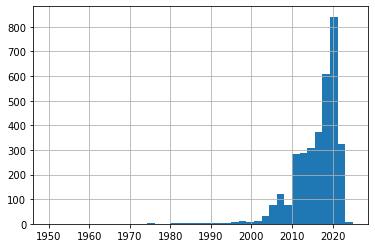

In [19]:
# Visualize frequency of missingness for Gender column
df_small[df_small.Gender.isnull()].Year.hist(bins=40)

<AxesSubplot:>

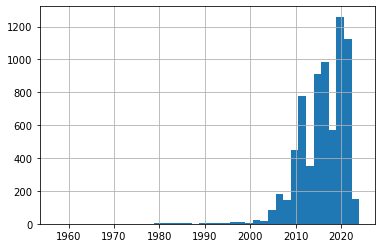

In [20]:
# Compare to frequency of non-missingness for Gender column
df_small[df_small.Gender.notnull()].Year.hist(bins=40)

In [21]:
# Filter to selected columns and remove empties
df_small = df_small[['ID', 'Abstract', 'Year', 'ProductType', 'Gender']].dropna(
    subset=['Abstract', 'Year', 'Gender'])

In [22]:
import nltk
ps = nltk.stem.PorterStemmer()
df_small.Abstract.apply(lambda abstract: ps.stem(abstract))

0       parallel vetted publication of the neh sponsor...
1       this comparative study of late nineteenth cent...
2       this comparative spatial history combines hist...
3       one of the early drivers of historical gis was...
4       a wilderness, as defined by the 1964 congressi...
                              ...                        
1406    the kennywood grant project instagram post cre...
1407    the kennywood grant project facebook post crea...
1408    the kennywood park records digital collection ...
1412    the online finding aid for the kennywood park ...
1413          marc record for the kennywood park records.
Name: Abstract, Length: 7108, dtype: object

## Save prepared data _with gender_ to disk

In [23]:
df_small.to_csv(join('../data/', 'NEH_GrantProducts_Prepared_w_Gender.tsv'), sep='\t', index=False)